In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp39-cp39-linux_x86_64.whl size=44089 sha256=b18f5b182762a48859c7f2d2a15e2c9d97b4614a32ef59472a228425bd313b5d
  Stored in directory: /root/.cache/pip/wheels/68/be/8f/b6c454cd264e0b349b47f8ee00755511f277618af9e5dae20d
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.6.7 requires PyYAML>=5.4.1, but you have pyyaml 5.1 which is incompatible.
dask 2022.12.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.

In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  1.13 ; cuda:  cu116
detectron2: 0.6


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Colab/Plasmodium_model/test_set.zip

Archive:  /content/gdrive/MyDrive/Colab/Plasmodium_model/test_set.zip
   creating: test_set/
  inflating: test_set/001901.jpg     
  inflating: test_set/001902.jpg     
  inflating: test_set/001903.jpg     
  inflating: test_set/001904.jpg     
  inflating: test_set/001905.jpg     
  inflating: test_set/001906.jpg     
  inflating: test_set/001907.jpg     
  inflating: test_set/001908.jpg     
  inflating: test_set/001909.jpg     
  inflating: test_set/001910.jpg     
  inflating: test_set/001911.jpg     
  inflating: test_set/001912.jpg     
  inflating: test_set/001913.jpg     
  inflating: test_set/001914.jpg     
  inflating: test_set/001915.jpg     
  inflating: test_set/001916.jpg     
  inflating: test_set/001917.jpg     
  inflating: test_set/001918.jpg     
  inflating: test_set/001919.jpg     
  inflating: test_set/001920.jpg     
  inflating: test_set/001921.jpg     
  inflating: test_set/001922.jpg     
  inflating: test_set/001923.jpg     
  inflating: test_set/001924.jpg 

In [ ]:
dataset_dir_11 = "/content/train/"
train_dir = "train/"
val_dir = "valid/"
#test_dir = "test/"

In [ ]:
!unzip /content/gdrive/MyDrive/Colab/Plasmodium_model/valid.zip

Archive:  /content/gdrive/MyDrive/Colab/Plasmodium_model/valid.zip
   creating: archive/
   creating: archive/bdd_coco/
   creating: archive/bdd_coco/test/
  inflating: archive/bdd_coco/test/005000.jpg  
  inflating: archive/bdd_coco/test/005001.jpg  
  inflating: archive/bdd_coco/test/005002.jpg  
  inflating: archive/bdd_coco/test/005003.jpg  
  inflating: archive/bdd_coco/test/005004.jpg  
  inflating: archive/bdd_coco/test/005005.jpg  
  inflating: archive/bdd_coco/test/005006.jpg  
  inflating: archive/bdd_coco/test/005007.jpg  
  inflating: archive/bdd_coco/test/005008.jpg  
  inflating: archive/bdd_coco/test/005009.jpg  
  inflating: archive/bdd_coco/test/005010.jpg  
  inflating: archive/bdd_coco/test/005011.jpg  
  inflating: archive/bdd_coco/test/005012.jpg  
  inflating: archive/bdd_coco/test/005013.jpg  
  inflating: archive/bdd_coco/test/005014.jpg  
  inflating: archive/bdd_coco/test/005015.jpg  
  inflating: archive/bdd_coco/test/005016.jpg  
  inflating: archive/bdd_coc

In [ ]:
from detectron2.data.datasets import register_coco_instances
#register_coco_instances("train", {}, "/content/gdrive/MyDrive/Colab/Detector2/binary_train_annotation.json", "/content/train/")
#register_coco_instances("valid", {}, "/content/gdrive/MyDrive/Colab/Plasmodium_model/valid_annotation_binary.json", "/content/archive/bdd_coco/test")
register_coco_instances("test2", {}, "/content/gdrive/MyDrive/Colab/Plasmodium_model/instances_default.json", "/content/test_set/")


In [ ]:
DatasetCatalog.clear()

In [ ]:
dataset_dicts = DatasetCatalog.get("test2")
metadata_dicts = MetadataCatalog.get("test2")

[03/25 13:54:41 d2.data.datasets.coco]: Loaded 100 images in COCO format from /content/gdrive/MyDrive/Colab/Plasmodium_model/instances_default.json


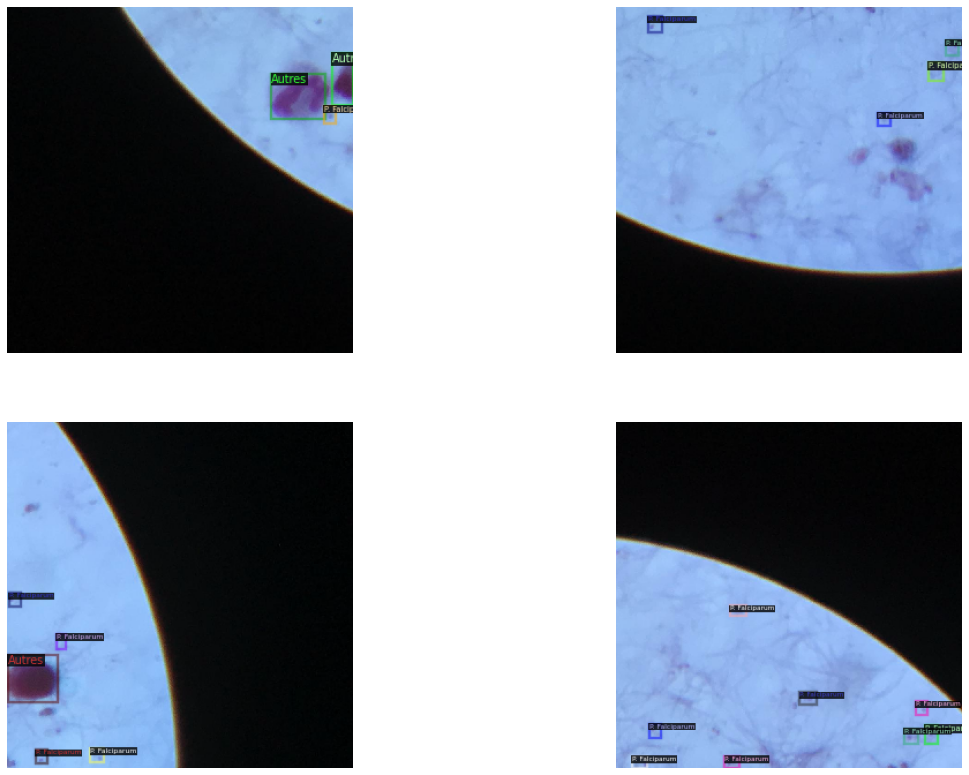

In [ ]:
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import ColorMode
fig, ax = plt.subplots(2, 2, figsize =(20,14))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1]]
i=-1
for d in random.sample(dataset_dicts, 4):
    i=i+1
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1],
                   metadata=metadata_dicts,
                   scale=0.4,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_dataset_dict(d)
    indices[i].grid(False)
    indices[i].axis('off')
    indices[i].imshow(out.get_image()[:, :, ::-1])


In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader, build_detection_train_loader
from detectron2.data import detection_utils as utils
import detectron2.data.transforms as T
from detectron2.engine import DefaultTrainer

def custom_mapper(dataset_dict):
    dataset_dict = copy.deepcopy(dataset_dict)
    image = utils.read_image(dataset_dict["file_name"], format="BGR")
    transform_list = [T.Resize((640,640)),
                      T.RandomBrightness(0.9, 1.1),
                      T.RandomFlip(prob=0.5, horizontal=False, vertical=True),
                      T.RandomFlip(prob=0.5, horizontal=True, vertical=False),
                      T.RandomCrop("absolute", (640, 640))
                      ]
    image, transforms = T.apply_transform_gens(transform_list, image)
    dataset_dict["image"] = torch.as_tensor(image.transpose(2, 0, 1).astype("float32"))

    annos = [
        utils.transform_instance_annotations(obj, transforms, image.shape[:2])
        for obj in dataset_dict.pop("annotations")
        if obj.get("iscrowd", 0) == 0
    ]
    instances = utils.annotations_to_instances(annos, image.shape[:2])
    dataset_dict["instances"] = utils.filter_empty_instances(instances)
    return dataset_dict
class AugTrainer(DefaultTrainer):
    @classmethod
    def build_train_loader(cls, cfg):
      return build_detection_train_loader(cfg, mapper=custom_mapper)

In [ ]:
from detectron2.engine.hooks import HookBase
from detectron2.evaluation import inference_context
from detectron2.utils.logger import log_every_n_seconds
from detectron2.data import DatasetMapper, build_detection_test_loader
import detectron2.utils.comm as comm
import torch
import time
import datetime
import logging

class LossEvalHook(HookBase):
    def __init__(self, eval_period, model, data_loader):
        self._model = model
        self._period = eval_period
        self._data_loader = data_loader

    def _do_loss_eval(self):
        # Copying inference_on_dataset from evaluator.py
        total = len(self._data_loader)
        num_warmup = min(5, total - 1)

        start_time = time.perf_counter()
        total_compute_time = 0
        losses = []
        for idx, inputs in enumerate(self._data_loader):
            if idx == num_warmup:
                start_time = time.perf_counter()
                total_compute_time = 0
            start_compute_time = time.perf_counter()
            if torch.cuda.is_available():
                torch.cuda.synchronize()
            total_compute_time += time.perf_counter() - start_compute_time
            iters_after_start = idx + 1 - num_warmup * int(idx >= num_warmup)
            seconds_per_img = total_compute_time / iters_after_start
            if idx >= num_warmup * 2 or seconds_per_img > 5:
                total_seconds_per_img = (time.perf_counter() - start_time) / iters_after_start
                eta = datetime.timedelta(seconds=int(total_seconds_per_img * (total - idx - 1)))
                log_every_n_seconds(
                    logging.INFO,
                    "Loss on Validation  done {}/{}. {:.4f} s / img. ETA={}".format(
                        idx + 1, total, seconds_per_img, str(eta)
                    ),
                    n=5,
                )
            loss_batch = self._get_loss(inputs)
            losses.append(loss_batch)
        mean_loss = np.mean(losses)
        self.trainer.storage.put_scalar('validation_loss', mean_loss)
        comm.synchronize()

        return losses

    def _get_loss(self, data):
        # How loss is calculated on train_loop
        metrics_dict = self._model(data)
        metrics_dict = {
            k: v.detach().cpu().item() if isinstance(v, torch.Tensor) else float(v)
            for k, v in metrics_dict.items()
        }
        total_losses_reduced = sum(loss for loss in metrics_dict.values())
        return total_losses_reduced


    def after_step(self):
        next_iter = self.trainer.iter + 1
        is_final = next_iter == self.trainer.max_iter
        if is_final or (self._period > 0 and next_iter % self._period == 0):
            self._do_loss_eval()
        self.trainer.storage.put_scalars(timetest=12)

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

class MyTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, False, output_folder)

    def build_hooks(self):
        hooks = super().build_hooks()
        hooks.insert(-1,LossEvalHook(
            cfg.TEST.EVAL_PERIOD,
            self.model,
            build_detection_test_loader(
                self.cfg,
                self.cfg.DATASETS.TEST[0],
                DatasetMapper(self.cfg,True)
            )
        ))
        return hooks

In [ ]:
#"COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
# select from modelzoo here: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md#coco-object-detection-baselines

from detectron2.engine import DefaultTrainer
from detectron2.checkpoint import DetectionCheckpointer
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train",)
cfg.DATASETS.TEST = ("valid",)
cfg.TEST.EVAL_PERIOD = 100
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "/content/gdrive/MyDrive/Colab/Plasmodium_model/model_folder/model01032023.pth"  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 16  # This is the real "batch size" commonly known to deep learning people
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 1000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# trainer = MyTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()

#model = DefaultPredictor(cfg)

In [ ]:
import json


experiment_folder = './output'

def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

plt.plot(
    [x['iteration'] for x in experiment_metrics],
    [x['total_loss'] for x in experiment_metrics])
plt.plot(
    [x['iteration'] for x in experiment_metrics if 'validation_loss' in x],
    [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x])
plt.legend(['total_loss', 'validation_loss'], loc='upper left')
plt.show()

KeyError: ignored

In [ ]:
!unzip /content/gdrive/MyDrive/Colab/Detector2/archive.zip

In [ ]:
checkpointer = DetectionCheckpointer(trainer.model, save_dir="/content/gdrive/MyDrive/Colab/Detector2/model")

In [ ]:
def load_model(filename) :
    cfg = get_cfg() #Crée un fichier de configuration
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")) #Récupère l'architecture du modèle
    #cfg.MODEL.DEVICE = "cpu" #Décommentez ceci si vous n'avez pas de GPU Cuda
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2 #Nombre de classes + 1 pour le background
    cfg.MODEL.WEIGHTS = filename #Chargement des poids
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 #Seuil de décision
    predictor = DefaultPredictor(cfg) #Création du prédicteur
    return predictor

model = load_model("/content/gdrive/MyDrive/Colab/Plasmodium_model/model_folder/model01032023.pth")

[03/25 13:55:10 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/gdrive/MyDrive/Colab/Plasmodium_model/model_folder/model01032023.pth ...


In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("test2", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "test2")
print(inference_on_dataset(model.model, val_loader, evaluator))

[03/25 13:55:52 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
[03/25 13:55:52 d2.data.datasets.coco]: Loaded 100 images in COCO format from /content/gdrive/MyDrive/Colab/Plasmodium_model/instances_default.json
[03/25 13:55:52 d2.data.build]: Distribution of instances among all 2 categories:
|   category    | #instances   |  category  | #instances   |
|:-------------:|:-------------|:----------:|:-------------|
| P. Falciparum | 1239         |   Autres   | 86           |
|               |              |            |              |
|     total     | 1325         |            |              |
[03/25 13:55:52 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[03/25 13:55:52 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[03/25 13:55:52 d2.data.common]: Serializing 100 elemen

/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[03/25 13:56:05 d2.evaluation.evaluator]: Inference done 24/100. Dataloading: 0.0018 s/iter. Inference: 0.2179 s/iter. Eval: 0.0002 s/iter. Total: 0.2199 s/iter. ETA=0:00:16
[03/25 13:56:10 d2.evaluation.evaluator]: Inference done 46/100. Dataloading: 0.0021 s/iter. Inference: 0.2229 s/iter. Eval: 0.0003 s/iter. Total: 0.2254 s/iter. ETA=0:00:12
[03/25 13:56:15 d2.evaluation.evaluator]: Inference done 66/100. Dataloading: 0.0028 s/iter. Inference: 0.2304 s/iter. Eval: 0.0003 s/iter. Total: 0.2337 s/iter. ETA=0:00:07
[03/25 13:56:20 d2.evaluation.evaluator]: Inference done 89/100. Dataloading: 0.0026 s/iter. Inference: 0.2282 s/iter. Eval: 0.0003 s/iter. Total: 0.2312 s/iter. ETA=0:00:02
[03/25 13:56:23 d2.evaluation.evaluator]: Total inference time: 0:00:21.912673 (0.230660 s / iter per device, on 1 devices)
[03/25 13:56:23 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:21 (0.227325 s / iter per device, on 1 devices)
[03/25 13:56:23 d2.evaluation.coco_evaluation]: Pr

In [ ]:
def load_model(filename) :
    cfg = get_cfg() #Crée un fichier de configuration
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")) #Récupère l'architecture du modèle
    #cfg.MODEL.DEVICE = "cpu" #Décommentez ceci si vous n'avez pas de GPU Cuda
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2 #Nombre de classes + 1 pour le background
    cfg.MODEL.WEIGHTS = filename #Chargement des poids
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 #Seuil de décision
    predictor = DefaultPredictor(cfg) #Création du prédicteur
    return predictor

model = load_model("/content/gdrive/MyDrive/Colab/Plasmodium_model/model_folder/model01032023.pth")

[03/23 20:15:35 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/gdrive/MyDrive/Colab/Plasmodium_model/model_folder/model01032023.pth ...


In [ ]:
import skimage.io as io
img = io.imread("/content/test_set/002001.jpg")
output = model(img)

In [ ]:
print(output)

{'instances': Instances(num_instances=19, image_height=750, image_width=750, fields=[pred_boxes: Boxes(tensor([[606.8640,  42.9961, 637.0284,  70.6974],
        [133.6536, 116.1732, 164.2621, 144.1841],
        [403.5540,  61.6985, 431.7335,  90.8145],
        [535.9351, 116.9920, 567.4229, 140.6090],
        [648.7997,  40.7885, 671.3946,  64.3032],
        [420.5617, 100.9261, 440.0269, 126.4321],
        [309.6461, 174.4269, 347.7064, 199.1460],
        [318.5722, 238.5829, 342.6425, 274.2371],
        [ 35.3163,  65.3921,  66.7058,  92.2960],
        [294.7570, 326.2353, 322.6832, 350.5524],
        [503.0944, 504.6023, 525.5978, 544.6006],
        [233.0257, 463.3969, 261.0803, 496.3476],
        [320.7080, 597.3531, 343.7784, 625.8877],
        [408.6076,   3.2028, 495.1206,  89.7479],
        [245.2266, 383.9813, 275.1849, 419.7641],
        [557.9860, 719.7138, 590.7335, 750.0000],
        [548.5864, 122.1601, 567.3853, 140.2497],
        [238.2052, 253.1284, 269.0383, 275.4007

In [ ]:
print(metadata_dicts.thing_classes)

['P. Falciparum', 'Autres']


In [ ]:
import pandas as pd
metrics_df = pd.read_json("output/coco_instances_results.json", orient="records", lines=True)
mdf.T

KeyError: ignored

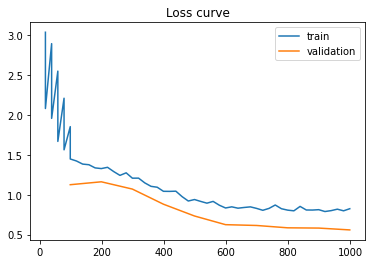

In [ ]:
# 1. Loss curve
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

mdf1 = mdf[~mdf["total_loss"].isna()]
ax.plot(mdf1["iteration"], mdf1["total_loss"], c="C0", label="train")
if "validation_loss" in mdf.columns:
    mdf2 = mdf[~mdf["validation_loss"].isna()]
    ax.plot(mdf2["iteration"], mdf2["validation_loss"], c="C1", label="validation")

# ax.set_ylim([0, 0.5])
ax.legend()
ax.set_title("Loss curve")
plt.show()

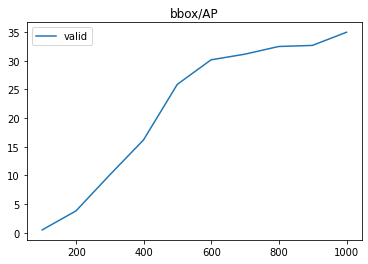

In [ ]:
# 2. CLS_accuracy
fig, ax = plt.subplots()

mdf1 = mdf[~mdf["bbox/AP"].isna()]
ax.plot(mdf1["iteration"], mdf1["bbox/AP"], c="C0", label="valid")
# ax.set_ylim([0, 0.5])
ax.legend()
ax.set_title("bbox/AP")
plt.show()

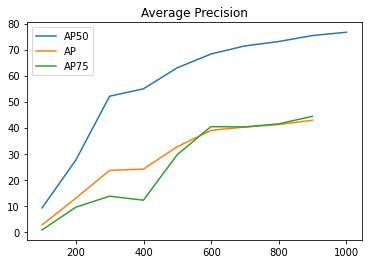

In [ ]:
# 2. CLS_accuracy
fig, ax = plt.subplots()

mdf1 = mdf[~mdf["bbox/AP"].isna()]
ax.plot(mdf1["iteration"], mdf1["bbox/AP50"], c="C0", label="AP50")
ax.plot(mdf2["iteration"], mdf2["bbox/AP"], c="C1", label="AP")
ax.plot(mdf2["iteration"], mdf2["bbox/AP75"], c="C2", label="AP75")
# ax.set_ylim([0, 0.5])
ax.legend()
ax.set_title("Average Precision")
plt.show()

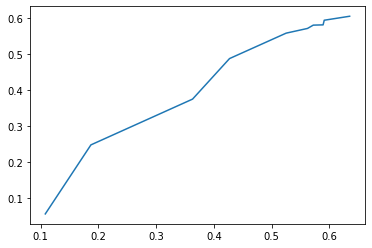

In [ ]:
fig, ax = plt.subplots()
recall = [0.108,0.187,0.363,0.427,0.525,0.562,0.572,0.589,0.591,0.635]
mdf1 = mdf[~mdf["bbox/AP50"].isna()]
precision = mdf1["bbox/AP50"]/100
ax.plot(recall, precision, c="C0", label="AP50")
# ax.legend()
# ax.set_title("Average Precision over Average Recall")
# plt.show()

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold for this model
cfg.DATASETS.TEST = ("test_1", )
predictor = DefaultPredictor(cfg)

[01/16 10:26:10 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [ ]:
test_dataset_dicts = DatasetCatalog.get("test2")
test_metadata_dicts = MetadataCatalog.get("test2")

[03/24 20:42:47 d2.data.datasets.coco]: Loaded 1000 images in COCO format from /content/gdrive/MyDrive/Colab/Plasmodium_model/instances_default.json


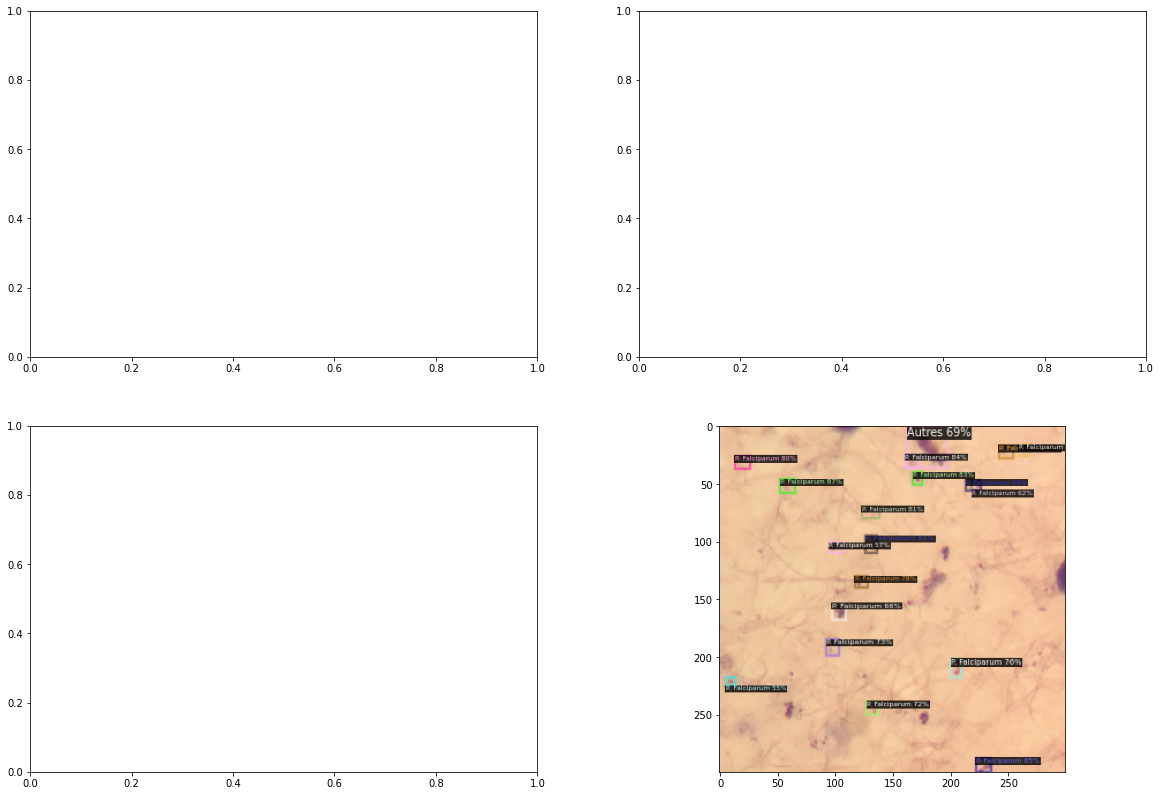

In [ ]:
import skimage.io as io
import json

fig, ax = plt.subplots(2, 2, figsize =(20,14))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1]]
i=-1
im = io.imread("/content/test_set/002001.jpg")
outputs = model(im)
    # with open(d["file_name"], 'w') as outfile :
    #   json.dump(outputs, outfile)


v = Visualizer(im[:, :, ::-1],
                   metadata=test_metadata_dicts,
                   scale=0.4,
    )
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
indices[i].grid(False)
indices[i].imshow(out.get_image()[:, :, ::-1])




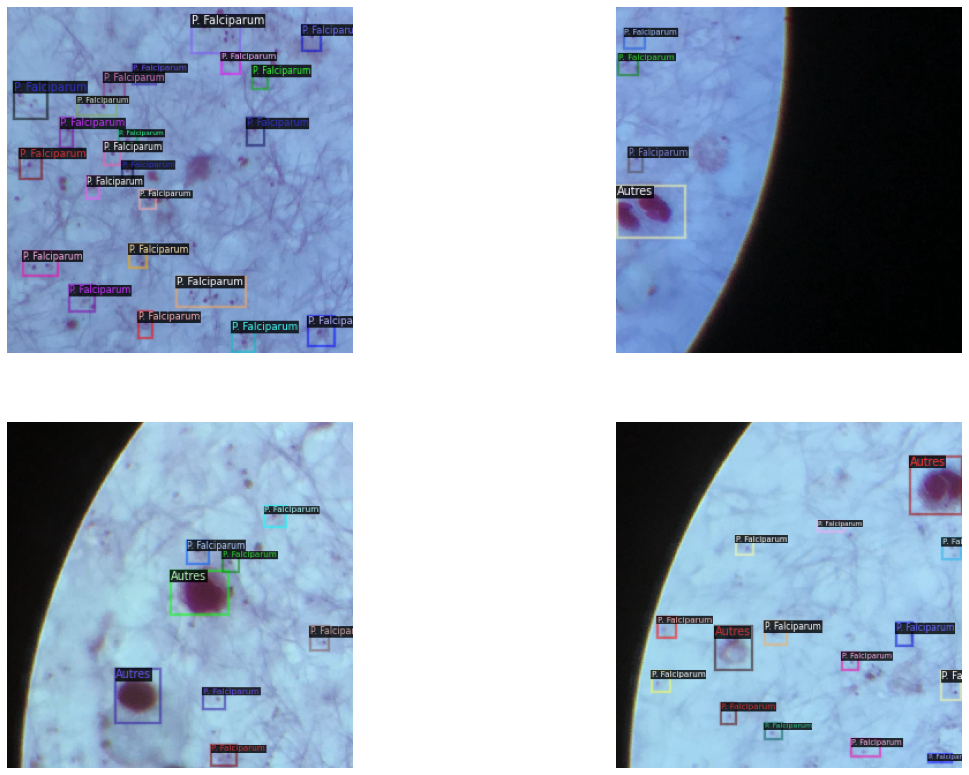

In [ ]:
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import ColorMode
fig, ax = plt.subplots(2, 2, figsize =(20,14))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1]]
i=-1
for d in random.sample(test_dataset_dicts, 4):
    i=i+1
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1],
                   metadata=test_metadata_dicts,
                   scale=0.4,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_dataset_dict(d)
    indices[i].grid(False)
    indices[i].axis('off')
    indices[i].imshow(out.get_image()[:, :, ::-1])